# Cohort analysis project

In [1]:
#import the necessary packages for this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load in the data and take a look
data=pd.read_excel("January to November Sales Data with ID 222.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21090 entries, 0 to 21089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Type         21090 non-null  object        
 1   Date         21090 non-null  datetime64[ns]
 2   Num          21090 non-null  int64         
 3   Item Name    21089 non-null  object        
 4   Name         21044 non-null  object        
 5   Qty          21090 non-null  int64         
 6   Sales Price  21090 non-null  float64       
 7   Amount       21090 non-null  float64       
 8   Unique ID    21044 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [7]:
#look at the head of the data
data.head()

,Type,Date,Num,Item Name,Name,Qty,Sales Price,Amount,Unique ID
0,Sales Receipt,2022-01-03,46162,Widal Kit,Winnie Crystal,1,600.0,600.0,PEF1475
1,Sales Receipt,2022-01-03,46163,MRDT,GOLGOTHA MEDICAL CENTRE,2,1300.0,2600.0,PEF464
2,Sales Receipt,2022-01-03,46164,oncall strip,Isaac,2,600.0,1200.0,PEF555
3,Sales Receipt,2022-01-03,46164,red top vacutainer,Isaac,2,500.0,1000.0,PEF555
4,Sales Receipt,2022-01-03,46164,PDT strips,Isaac,2,300.0,600.0,PEF555


In [8]:
# rename the columns of the data
data.rename(columns={"Date":"Invoice Date","Num":"Invoice Number","Name":"Customer Name","Unique ID":"Customer ID"},inplace=True)

In [9]:
data.head()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID
0,Sales Receipt,2022-01-03,46162,Widal Kit,Winnie Crystal,1,600.0,600.0,PEF1475
1,Sales Receipt,2022-01-03,46163,MRDT,GOLGOTHA MEDICAL CENTRE,2,1300.0,2600.0,PEF464
2,Sales Receipt,2022-01-03,46164,oncall strip,Isaac,2,600.0,1200.0,PEF555
3,Sales Receipt,2022-01-03,46164,red top vacutainer,Isaac,2,500.0,1000.0,PEF555
4,Sales Receipt,2022-01-03,46164,PDT strips,Isaac,2,300.0,600.0,PEF555


In [10]:
# let check for null values
data.isnull().sum()

Type               0
Invoice Date       0
Invoice Number     0
Item Name          1
Customer Name     46
Qty                0
Sales Price        0
Amount             0
Customer ID       46
dtype: int64

In [12]:
#drop rows with no Customer ID and check if the null values are removed
data=data.dropna(subset="Customer ID")
data.isnull().sum()

Type              0
Invoice Date      0
Invoice Number    0
Item Name         1
Customer Name     0
Qty               0
Sales Price       0
Amount            0
Customer ID       0
dtype: int64

In [22]:
#create invoice month
import datetime as dt
#the function for month
def get_month(x):
    return dt.datetime(x.year,x.month,1)
data["Invoice_Month"]=data["Invoice Date"].apply(get_month)
data.tail()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Invoice Month,Cohort Month,Invoice_Month
21085,Sales Receipt,2022-11-30,52658,Polypots,Blossom Medical Laboratory,300,3.0,900.0,PEF138,2022-11-01,2022-01-01,2022-11-01
21086,Sales Receipt,2022-11-30,52658,EDTA Tubes,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01
21087,Sales Receipt,2022-11-30,52658,Plain Tube With Clot,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01
21088,Sales Receipt,2022-11-30,52659,EDTA Tubes,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01
21089,Sales Receipt,2022-11-30,52659,Plain Tube With Clot,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01


In [23]:
#create a column index with the minimum invoice date of the first the customer was acquired
data["Cohort_Month"]=data.groupby("Customer ID")["Invoice Month"].transform("min")
data.tail(10)

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Invoice Month,Cohort Month,Invoice_Month,Cohort_Month
21080,Sales Receipt,2022-11-30,52657,Blue Tips,Ecomed,5,300.0,1500.0,PEF315,2022-11-01,2022-07-01,2022-11-01,2022-07-01
21081,Sales Receipt,2022-11-30,52658,Blue Tips,Blossom Medical Laboratory,2,500.0,1000.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21082,Sales Receipt,2022-11-30,52658,Yellow Tips,Blossom Medical Laboratory,1,500.0,500.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21083,Sales Receipt,2022-11-30,52658,URINALYSIS PARA 10,Blossom Medical Laboratory,1,600.0,600.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21084,Sales Receipt,2022-11-30,52658,RF Kit,Blossom Medical Laboratory,1,800.0,800.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21085,Sales Receipt,2022-11-30,52658,Polypots,Blossom Medical Laboratory,300,3.0,900.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21086,Sales Receipt,2022-11-30,52658,EDTA Tubes,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21087,Sales Receipt,2022-11-30,52658,Plain Tube With Clot,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21088,Sales Receipt,2022-11-30,52659,EDTA Tubes,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01,2022-01-01
21089,Sales Receipt,2022-11-30,52659,Plain Tube With Clot,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01,2022-01-01


In [28]:
#create a date element function to get a series of substraction
def get_date_elements(df,column):
    day=df[column].dt.day
    month=df[column].dt.month
    year=df[column].dt.year
    return day,month,year
    

In [29]:
#get date elements from our cohort and invoice columns
_,Invoice_Month,Invoice_Year=get_date_elements(data,"Invoice_Month")
_,Cohort_month,Cohort_Year=get_date_elements(data,"Cohort_Month")

In [30]:
#check the series
Invoice_Month[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Invoice_Month, dtype: int64

In [31]:
Cohort_Year[:10]

0    2022
1    2022
2    2022
3    2022
4    2022
5    2022
6    2022
7    2022
8    2022
9    2022
Name: Cohort_Month, dtype: int64

In [41]:
#create a cohort index to show when the customer was first acquired
year_diff=Invoice_Year-Cohort_Year
month_diff=Invoice_Month-Cohort_month
data["Cohort_Index"]=year_diff*12+month_diff+1
data.tail()

,Type,Invoice Date,Invoice Number,Item Name,Customer Name,Qty,Sales Price,Amount,Customer ID,Invoice Month,Cohort Month,Invoice_Month,Cohort_Month,Cohort_Index
21085,Sales Receipt,2022-11-30,52658,Polypots,Blossom Medical Laboratory,300,3.0,900.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01,11
21086,Sales Receipt,2022-11-30,52658,EDTA Tubes,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01,11
21087,Sales Receipt,2022-11-30,52658,Plain Tube With Clot,Blossom Medical Laboratory,1,700.0,700.0,PEF138,2022-11-01,2022-01-01,2022-11-01,2022-01-01,11
21088,Sales Receipt,2022-11-30,52659,EDTA Tubes,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01,2022-01-01,11
21089,Sales Receipt,2022-11-30,52659,Plain Tube With Clot,Timoline Enterprises,10,600.0,6000.0,PEF1395,2022-11-01,2022-01-01,2022-11-01,2022-01-01,11


In [47]:
#count the customer ID by grouping cohort index and cohort month
Cohort_data=data.groupby(["Cohort_Month","Cohort_Index"])["Customer ID"].apply(pd.Series.nunique).reset_index()
Cohort_data

,Cohort_Month,Cohort_Index,Customer ID
0,2022-01-01,1,307
1,2022-01-01,2,157
2,2022-01-01,3,138
3,2022-01-01,4,147
4,2022-01-01,5,152
...,...,...,...
61,2022-09-01,2,17
62,2022-09-01,3,21
63,2022-10-01,1,74
64,2022-10-01,2,18


In [51]:
#create Pivot table
Cohort_table=Cohort_data.pivot(index="Cohort_Month",columns="Cohort_Index",values="Customer ID")
Cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,
2022-01-01,307.0,157.0,138.0,147.0,152.0,160.0,140.0,127.0,129.0,128.0,128.0
2022-02-01,175.0,37.0,44.0,46.0,50.0,48.0,43.0,35.0,48.0,51.0,NaN
2022-03-01,153.0,44.0,47.0,35.0,31.0,32.0,32.0,39.0,39.0,NaN,NaN
2022-04-01,111.0,24.0,20.0,22.0,20.0,18.0,17.0,21.0,NaN,NaN,NaN
2022-05-01,104.0,15.0,13.0,12.0,15.0,15.0,18.0,NaN,NaN,NaN,NaN
2022-06-01,98.0,16.0,16.0,13.0,19.0,16.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,81.0,10.0,5.0,6.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,104.0,13.0,20.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,90.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Cohort_Index', ylabel='Cohort_Month'>

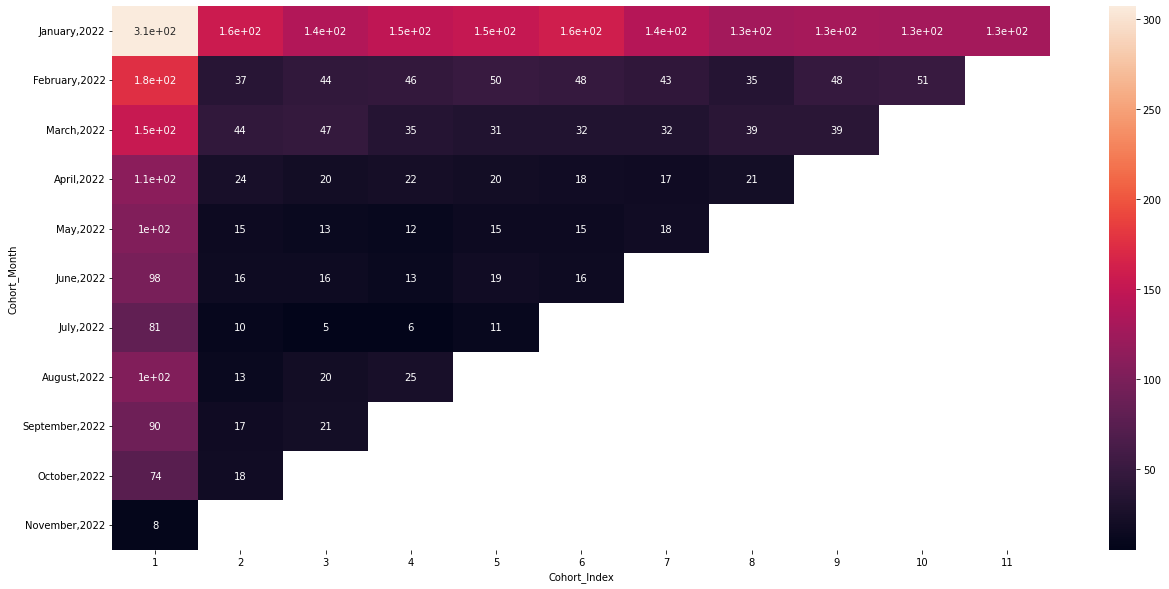

In [65]:

#visualize the result in a heat map
plt.figure(figsize=(21,10))
sns.heatmap(Cohort_table,annot=True)

In [69]:
#Cohort table for percentages
New_cohort_table=Cohort_table.divide(Cohort_table.iloc[:,0],axis=0)

In [70]:
New_cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,
"January,2022",1.0,0.511401,0.449511,0.478827,0.495114,0.521173,0.456026,0.413681,0.420195,0.416938,0.416938
"February,2022",1.0,0.211429,0.251429,0.262857,0.285714,0.274286,0.245714,0.200000,0.274286,0.291429,NaN
"March,2022",1.0,0.287582,0.307190,0.228758,0.202614,0.209150,0.209150,0.254902,0.254902,NaN,NaN
"April,2022",1.0,0.216216,0.180180,0.198198,0.180180,0.162162,0.153153,0.189189,NaN,NaN,NaN
"May,2022",1.0,0.144231,0.125000,0.115385,0.144231,0.144231,0.173077,NaN,NaN,NaN,NaN
"June,2022",1.0,0.163265,0.163265,0.132653,0.193878,0.163265,NaN,NaN,NaN,NaN,NaN
"July,2022",1.0,0.123457,0.061728,0.074074,0.135802,NaN,NaN,NaN,NaN,NaN,NaN
"August,2022",1.0,0.125000,0.192308,0.240385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"September,2022",1.0,0.188889,0.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Cohort_Index', ylabel='Cohort_Month'>

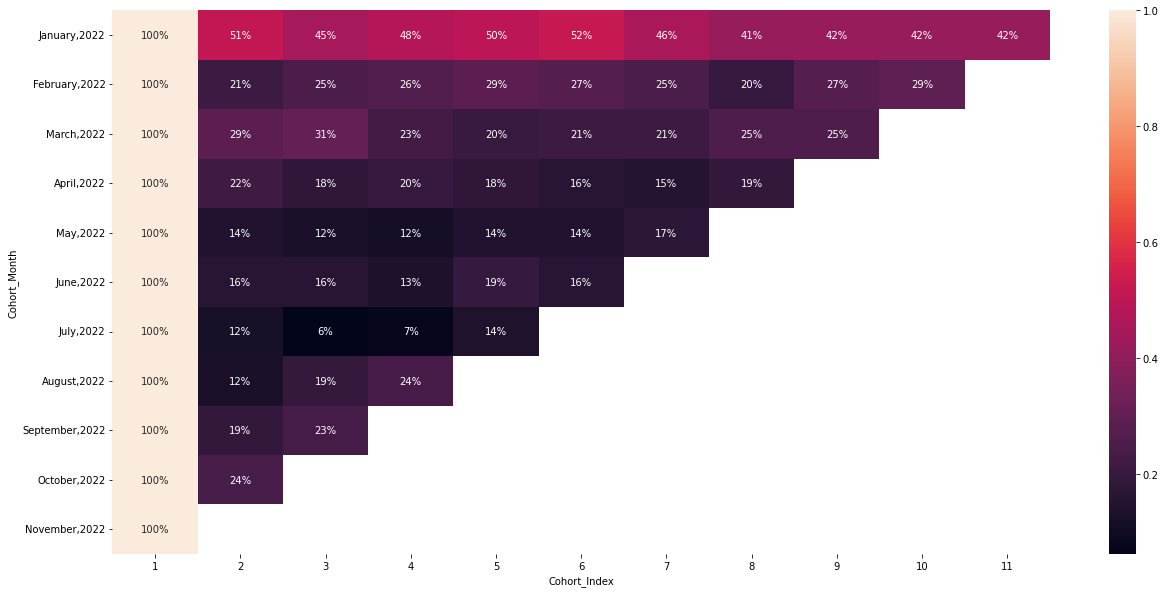

In [80]:
plt.figure(figsize=(21,10))
sns.heatmap(New_cohort_table,annot=True,fmt=".0%")